In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from eda_utils import EDA

In [2]:
df = pd.read_csv("../audit_data/audit_risk.csv")

In [3]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

##### All columns are numerical except one: LOCATION_ID - lets check it.

In [5]:
df["LOCATION_ID"]

0      23
1       6
2       6
3       6
4       6
       ..
771     9
772    16
773    14
774    18
775    15
Name: LOCATION_ID, Length: 776, dtype: object

In [6]:
df["LOCATION_ID"].sort_values().value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
27          8
21          8
43          7
25          6
20          5
30          4
7           4
36          4
38          4
3           3
40          3
35          2
41          1
42          1
24          1
44          1
23          1
34          1
33          1
17          1
LOHARU      1
NUH         1
SAFIDON     1
Name: LOCATION_ID, dtype: int64

In [7]:
df = df.drop(columns=["LOCATION_ID"])

I decided to drop LOCATION_ID column, because it has too many unique values and it would be hard to make column for each value. Plus, there is already many predictors, so getting rid of one column is not a hudge loss.

### Let's explore correlation between label variable - "Risk" and predictors.

In [8]:
df.corr()["Risk"]

Sector_score     -0.394131
PARA_A            0.378758
Score_A           0.619726
Risk_A            0.385067
PARA_B            0.257029
Score_B           0.635768
Risk_B            0.255286
TOTAL             0.292022
numbers           0.308141
Score_B.1         0.353803
Risk_C            0.342140
Money_Value       0.256992
Score_MV          0.688367
Risk_D            0.254355
District_Loss     0.403806
PROB              0.176912
RiSk_E            0.411803
History           0.239453
Prob              0.298639
Risk_F            0.214511
Score             0.785995
Inherent_Risk     0.357020
CONTROL_RISK      0.416474
Detection_Risk         NaN
Audit_Risk        0.217113
Risk              1.000000
Name: Risk, dtype: float64

In [9]:
df["Risk"].value_counts()

0    471
1    305
Name: Risk, dtype: int64

##### Let's check why correlation between DetectionRisk column nad label in nan.

In [10]:
df["Detection_Risk"].value_counts()

0.5    776
Name: Detection_Risk, dtype: int64

In [11]:
# correlation between Detection_Risk column and Risk column

df["Detection_Risk"].corr(df["Risk"])

nan

In [12]:
# covariance
df["Detection_Risk"].cov(df["Risk"])

0.0

In [13]:
# standard deviation of Detectin Risk
df["Detection_Risk"].std()

0.0

In [14]:
# Standard Deviation of Risk
df["Risk"].std()

0.4887408742557472

Correlation between Detection_Risk column and Risk label is nan, because: 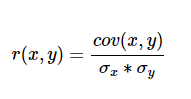

Since covarianve is zero and Detection_Risk column standard deviation is also zero, there is 0 / 0 problem, and this is why there is nan. <br>
<br>

I decide to drop Detection_Risk column.
<br>
Another argument in favour of dropping this column is that there is only one value in it, so there is no variability. In another words, there is no difference for label whether this column exists or not.

In [15]:
df = df.drop(columns=["Detection_Risk"])

In [16]:
df.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk'],
      dtype='object')

### Detecting highly correlated columns


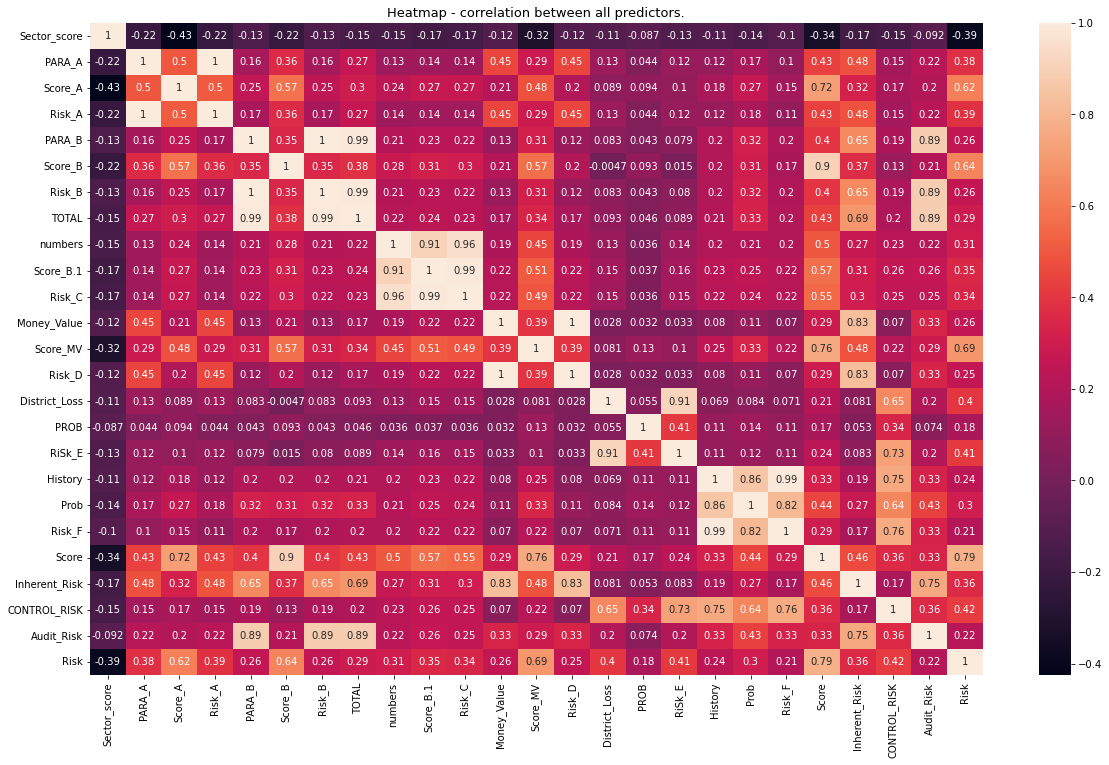

In [17]:
EDA.draw_corr_heatmap(df)

Above graph shows, that there are many columns to drop, because features shouldn't be correlated between each other. Predictors should be independent variables.

In [18]:
highly_correlated_columns_to_label = EDA.detect_highly_correlated_columns_to_label(df, 0.4)
highly_correlated_columns_to_label

{'Score_A': 0.6197255412547851,
 'Score_B': 0.6357682035755536,
 'Score_MV': 0.6883674212401255,
 'District_Loss': 0.40380574548631476,
 'RiSk_E': 0.41180349820386636,
 'Score': 0.7859952584905265,
 'CONTROL_RISK': 0.4164735707294502,
 'Risk': 1.0}

In [19]:
list(highly_correlated_columns_to_label.keys())

['Score_A',
 'Score_B',
 'Score_MV',
 'District_Loss',
 'RiSk_E',
 'Score',
 'CONTROL_RISK',
 'Risk']

In [21]:
columns = df.loc[:, df.columns != 'Risk']
not_to_drop_columns = list(highly_correlated_columns_to_label.keys())
potential_columns_to_drop = []


for columnA in columns:
    colA_Risk_corr = EDA.calculate_corr(df, columnA)
    
    if columnA not in not_to_drop_columns: 
        for columnB in columns:
            
            if columnA != columnB:
                if columnB not in not_to_drop_columns:
                    corr = EDA.calculate_corr(df, columnA, columnB)
                    colB_Risk_corr = EDA.calculate_corr(df, columnB)
                    
                    if corr > 0.6:
                        if colA_Risk_corr > colB_Risk_corr:
                            potential_columns_to_drop.append(columnB)
                        else:
                            potential_columns_to_drop.append(columnA)
        

In [22]:
potential_columns_to_drop = list(set(potential_columns_to_drop))
potential_columns_to_drop

['PARA_A',
 'Money_Value',
 'Risk_D',
 'Risk_F',
 'TOTAL',
 'numbers',
 'PARA_B',
 'Risk_C',
 'History',
 'Risk_B',
 'Audit_Risk']

In [23]:
df = df.drop(columns = potential_columns_to_drop)

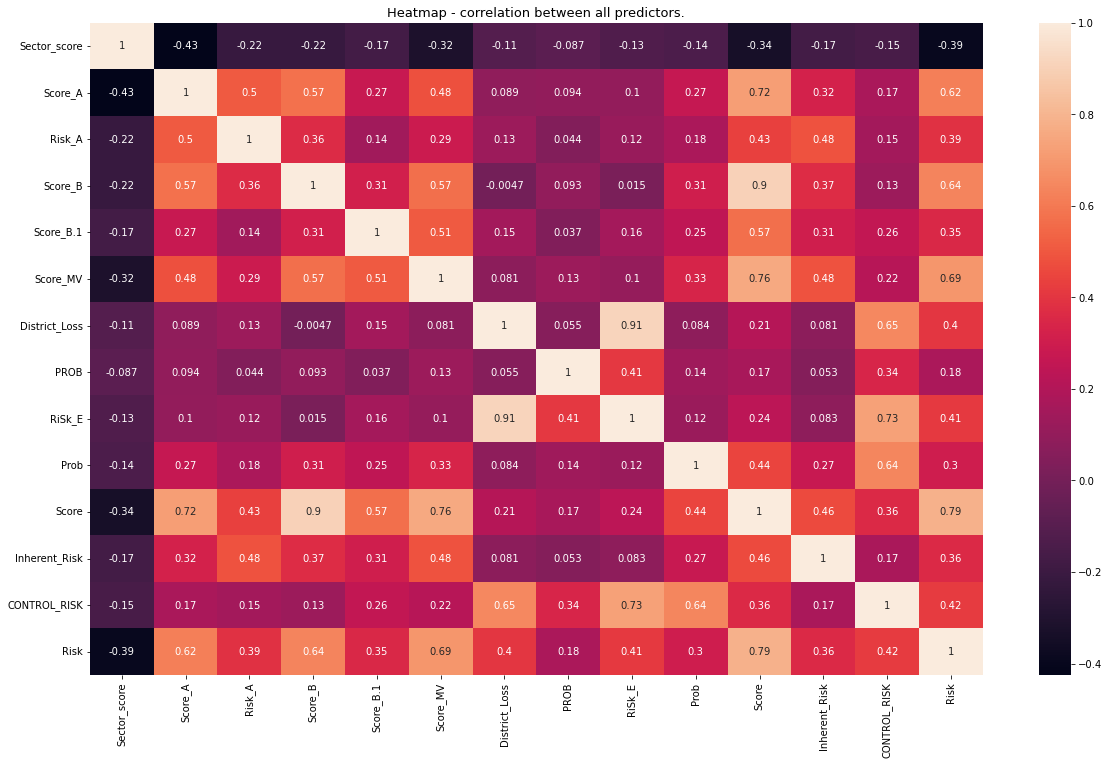

In [24]:
EDA.draw_corr_heatmap(df)

There are more highly correlated columns left to drop, however I want to do it manually.

In [25]:
df.corr()["Risk"].sort_values()

Sector_score    -0.394131
PROB             0.176912
Prob             0.298639
Score_B.1        0.353803
Inherent_Risk    0.357020
Risk_A           0.385067
District_Loss    0.403806
RiSk_E           0.411803
CONTROL_RISK     0.416474
Score_A          0.619726
Score_B          0.635768
Score_MV         0.688367
Score            0.785995
Risk             1.000000
Name: Risk, dtype: float64

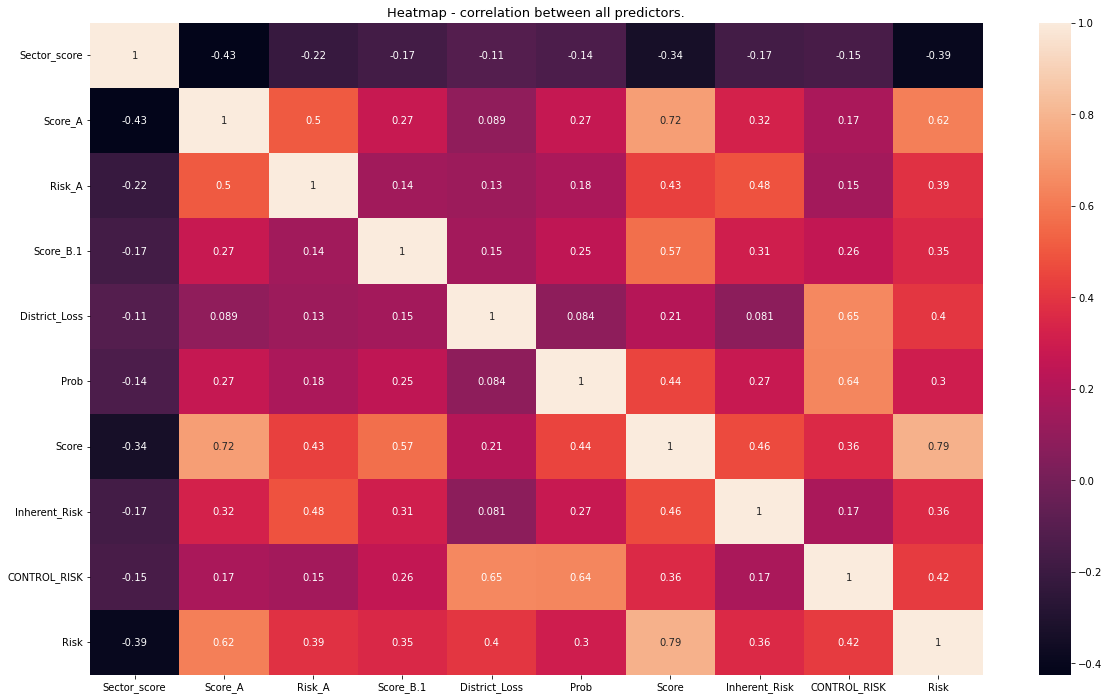

In [26]:
EDA.draw_corr_heatmap(df.drop(columns = ["Score_B", "RiSk_E", "Score_MV", "PROB"]))

In [27]:
df = df.drop(columns = ["Score_B", "RiSk_E", "Score_MV", "PROB"])
df.head()

,Sector_score,Score_A,Risk_A,Score_B.1,District_Loss,Prob,Score,Inherent_Risk,CONTROL_RISK,Risk
0,3.89,0.6,2.508,0.2,2,0.2,2.4,8.574,0.4,1
1,3.89,0.2,0.000,0.2,2,0.2,2.0,2.554,0.4,0
2,3.89,0.2,0.102,0.2,2,0.2,2.0,1.548,0.4,0
3,3.89,0.2,0.000,0.6,2,0.2,4.4,17.530,0.4,1
4,3.89,0.2,0.000,0.2,2,0.2,2.0,1.416,0.4,0


### Outliers

In [28]:
index_to_drop = []

for column in df.columns:
    print(f'Detecting outliers for: {column}')
    column_outliers = EDA.detect_outlier_iqr(df[column])
    index_to_drop.append(column_outliers)

Detecting outliers for: Sector_score
low_limit: -104.03 up_limit: 161.97
Detecting outliers for: Score_A
low_limit: -0.5999999999999999 up_limit: 1.4
Detecting outliers for: Risk_A
low_limit: -2.85 up_limit: 4.38
outlier value: 4.422
outlier value: 4.452
outlier value: 4.452
outlier value: 4.458
outlier value: 4.554
outlier value: 4.704
outlier value: 4.782
outlier value: 4.818
outlier value: 4.95
outlier value: 5.04
outlier value: 5.076
outlier value: 5.1
outlier value: 5.118
outlier value: 5.124
outlier value: 5.286
outlier value: 5.364
outlier value: 5.406
outlier value: 5.484
outlier value: 5.514
outlier value: 5.802
outlier value: 5.964
outlier value: 5.982
outlier value: 6.0
outlier value: 6.0
outlier value: 6.012
outlier value: 6.048
outlier value: 6.222
outlier value: 6.474
outlier value: 6.576
outlier value: 6.744
outlier value: 6.864
outlier value: 7.038
outlier value: 7.17
outlier value: 7.302
outlier value: 7.362
outlier value: 7.368
outlier value: 7.374
outlier value: 7.52

In [29]:
index_to_drop = [item for sublist in index_to_drop for item in sublist]

In [30]:
len(set(index_to_drop))

174

In [31]:
set(index_to_drop)

{602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768

##### Based on IQR method, there are too many detected rows to drop, so I should try another method. I would have to drop 174 aut of 776 rows - it is too many.
Another aproach is to draw predictors agains each other, in order to detect points that are against trend or too far from the group.

In [32]:
df.corr()["Risk"].sort_values()

Sector_score    -0.394131
Prob             0.298639
Score_B.1        0.353803
Inherent_Risk    0.357020
Risk_A           0.385067
District_Loss    0.403806
CONTROL_RISK     0.416474
Score_A          0.619726
Score            0.785995
Risk             1.000000
Name: Risk, dtype: float64

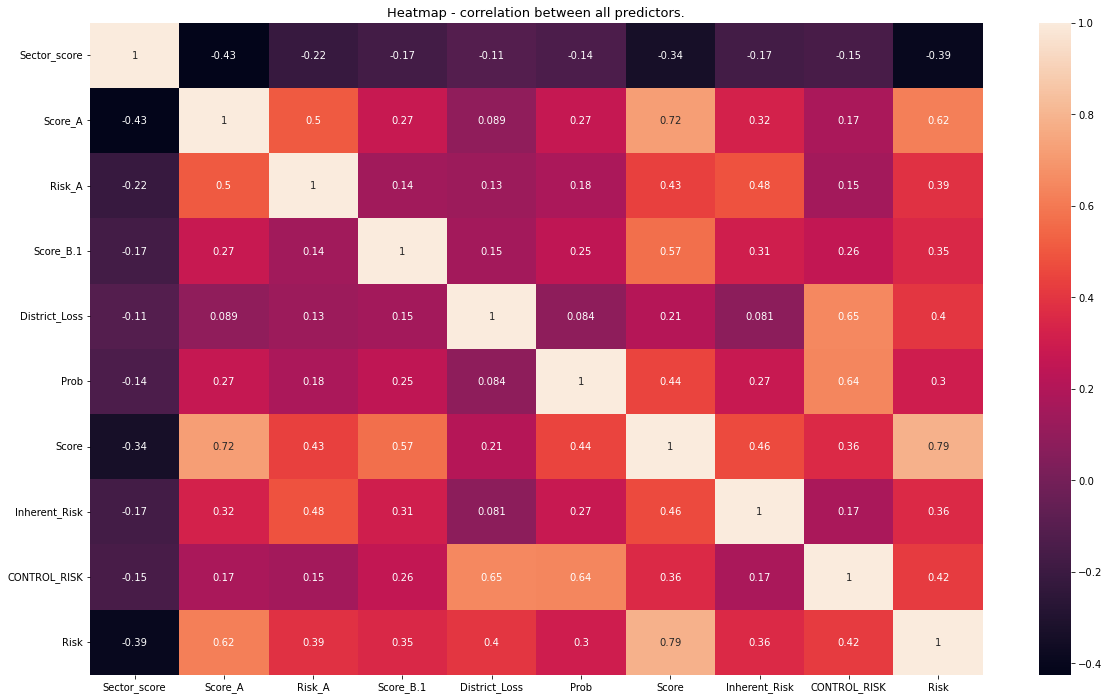

In [33]:
EDA.draw_corr_heatmap(df)

c:\Users\Katarzyna Knapik\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CONTROL_RISK', ylabel='Score'>

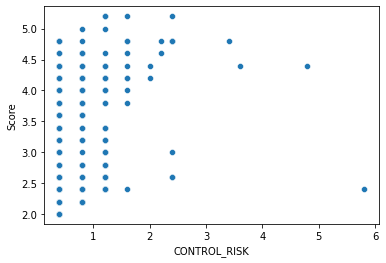

In [34]:
# Score

sns.scatterplot(df.CONTROL_RISK, df.Score)

In [35]:
mask = df.CONTROL_RISK >= 3
df.loc[mask].index

Int64Index([80, 276, 484, 486], dtype='int64')

In [36]:
# There are only 4 rows, so I can drop them

df = df.drop(index = list(df.loc[mask].index))

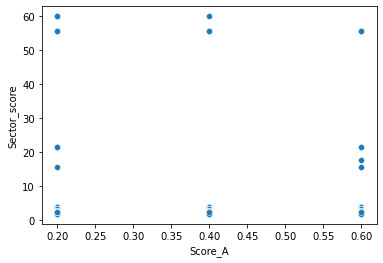

In [37]:
sns.scatterplot(data=df, x="Score_A", y="Sector_score");

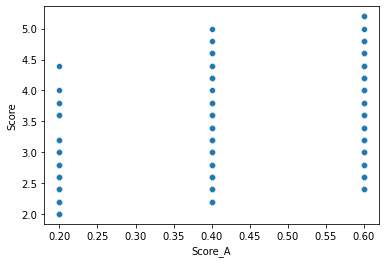

In [38]:
sns.scatterplot(data= df, x="Score_A", y="Score");

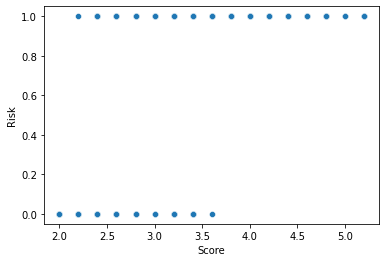

In [39]:
sns.scatterplot(data=df, x="Score", y="Risk");

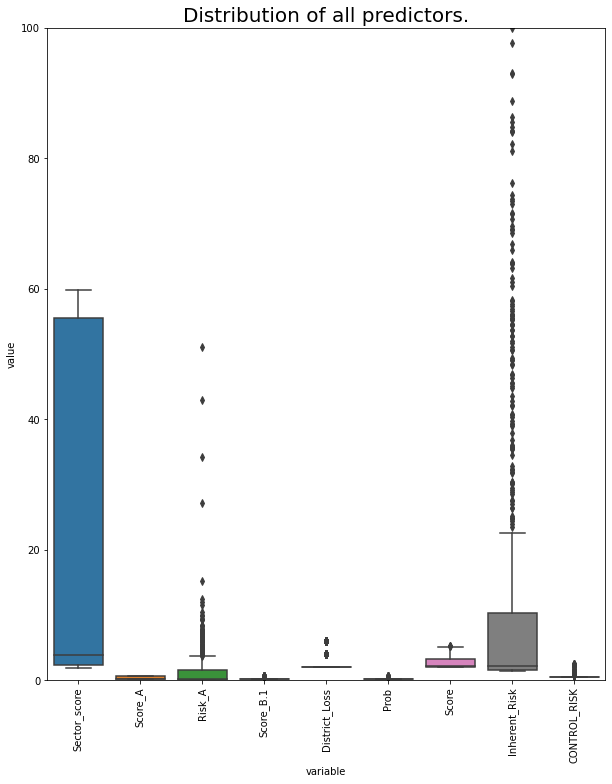

In [40]:
plt.figure(figsize=(10, 12))
sns.boxplot(x="variable", y="value", data=pd.melt(df.loc[:, df.columns != 'Risk']))
plt.title("Distribution of all predictors.", fontsize=20)
plt.ylim(0, 100)
plt.xticks(rotation=90);

In [41]:
EDA.detect_outliers_boxplot(df, "Inherent_Risk", 100)

     Sector_score  Score_A  Risk_A  Score_B.1  District_Loss  Prob  Score  \
22           3.89      0.6   3.186        0.2              2   0.4    4.2   
39           3.89      0.6   4.782        0.2              2   0.2    4.0   
65           3.89      0.6   5.286        0.2              2   0.4    3.6   
81           3.89      0.6  42.888        0.2              2   0.2    4.0   
157          3.41      0.6   6.222        0.6              2   0.2    4.8   
170          3.41      0.4   0.472        0.4              2   0.2    3.2   
206          2.72      0.6   2.304        0.2              2   0.4    4.4   
212          2.72      0.6   4.458        0.2              2   0.2    4.0   
218          2.72      0.6   3.612        0.6              4   0.2    5.0   
221          2.72      0.6   1.704        0.4              4   0.2    4.6   
225          2.72      0.6   2.658        0.4              2   0.2    4.4   
226          2.72      0.6   3.366        0.6              2   0.2    4.8   

In [42]:
EDA.detect_outliers_boxplot(df, "Risk_A", 20)

     Sector_score  Score_A  Risk_A  Score_B.1  District_Loss  Prob  Score  \
81           3.89      0.6  42.888        0.2              2   0.2    4.0   
342          1.99      0.6  34.218        0.2              2   0.2    4.0   
467          1.85      0.6  27.138        0.2              6   0.2    4.0   
509         21.61      0.6  51.000        0.2              6   0.2    3.4   

     Inherent_Risk  CONTROL_RISK  Risk  
81         583.688           0.4     1  
342        622.838           0.4     1  
467         51.046           1.2     1  
509         53.624           1.2     1  


Potential number of rows to drop: 4


Indexes to drop: Int64Index([81, 342, 467, 509], dtype='int64')


In [43]:
indexes = list(set([ 22,  39,  65,  81, 157, 170, 206, 212, 218, 221, 225, 226, 230, 235, 241, 247, 342, 368, 389, 494, 495, 584] + [81, 342, 467, 509]))
df = df.drop(index = indexes).reset_index(drop=True)

I decide not to drop other rows.

In [45]:
df

,Sector_score,Score_A,Risk_A,Score_B.1,District_Loss,Prob,Score,Inherent_Risk,CONTROL_RISK,Risk
0,3.89,0.6,2.508,0.2,2,0.2,2.4,8.574,0.4,1
1,3.89,0.2,0.000,0.2,2,0.2,2.0,2.554,0.4,0
2,3.89,0.2,0.102,0.2,2,0.2,2.0,1.548,0.4,0
3,3.89,0.2,0.000,0.6,2,0.2,4.4,17.530,0.4,1
4,3.89,0.2,0.000,0.2,2,0.2,2.0,1.416,0.4,0
...,...,...,...,...,...,...,...,...,...,...
743,55.57,0.2,0.098,0.2,2,0.2,2.0,1.578,0.4,0
744,55.57,0.2,0.094,0.2,2,0.2,2.0,1.568,0.4,0
745,55.57,0.2,0.048,0.2,2,0.2,2.0,1.456,0.4,0
746,55.57,0.2,0.040,0.2,2,0.2,2.0,1.440,0.4,0


#### NA Values

In [46]:
df.isna().sum()

Sector_score     0
Score_A          0
Risk_A           0
Score_B.1        0
District_Loss    0
Prob             0
Score            0
Inherent_Risk    0
CONTROL_RISK     0
Risk             0
dtype: int64

There is no NA values in the dataset.

### Save clean dataset

In [47]:
df.to_csv("../audit_data/final_audit.csv", index=False)